<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. What is DBSCAN?**
---
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm used to group similar data points together. Unlike some other methods, it doesn’t need you to specify the number of clusters before running. It works by finding areas where data points are close together (dense regions) and separating them from areas where data points are far apart (sparse regions).

**2. How Does DBSCAN Work?**
---
DBSCAN groups data points based on their density. Here are the main concepts:

* Core Points: These points have enough nearby neighbors (based on the minimum points, minPts) within a specific distance (eps).
* Border Points: These points are not core points but are close to core points.
* Noise Points: These are isolated points that are too far from any cluster, so they are marked as noise.

**3. Steps of DBSCAN**
---
1. Pick a point in the dataset.
2. Check if it has enough nearby neighbors within a distance (eps).
   * If it does, it becomes a core point, and a new cluster is created.
  * If it doesn't, it might be marked as noise.
3. Keep adding points to the cluster by finding more neighbors for the core points.
4. Repeat until all points are processed.

**4. Advantages and Disadvantages**
---
  **Advantages:**

* Good for different densities: DBSCAN can find clusters that have high and low densities.
* Handles outliers: It can easily identify and ignore noisy, isolated points.
* Clearly marks noise: DBSCAN makes it easy to see which points don't belong to any cluster.

**Disadvantages:**

* Not good with varying densities: DBSCAN struggles when clusters have very different densities.
* High-dimensional data: It doesn’t work well with many features or dimensions because distance measurements become less reliable.

**5. Comparing DBSCAN with Other Algorithms**
---
* K-Means: DBSCAN doesn’t need you to specify how many clusters you want, unlike K-Means.
* Hierarchical Clustering: DBSCAN is faster and better at handling noise compared to hierarchical methods.

**6. Where is DBSCAN Used?**
---
* Anomaly Detection: It’s great for finding unusual or outlier points in a dataset.
* Geospatial Data: DBSCAN is used for clustering geographical locations like cities or landmarks.
* Customer Segmentation: Businesses use it to group customers based on similar purchasing behavior.

**7. How to Use DBSCAN in Python**
---

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics

**Importing Dataset**

In [3]:
mall_csv = pd.read_csv('/content/drive/MyDrive/KMeans/Mall_Customers.csv')

**Understanding the data**

In [4]:
mall_csv.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_csv.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
mall_csv.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
mall_csv.shape

(200, 5)

**Data Preprocessing**

In [9]:
mall_csv.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
mall_csv.duplicated().sum()

0

**Model Building**

In [11]:
X = mall_csv.iloc[:,[3,4]].values

In [24]:
dbscan = DBSCAN(eps = 10, min_samples = 5)

In [25]:
#Fitting the dara to model
model = dbscan.fit_predict(X)

In [26]:
labels = model.labels_
labels

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1, -1,
        1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

*-1 indicates outliers*

In [27]:
sample_cores = np.zeros_like(labels, dtype = bool)
sample_cores[dbscan.core_sample_indices_] = True
sample_cores

array([False,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [28]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Estimated number of clusters:",n_clusters)

Estimated number of clusters: 4


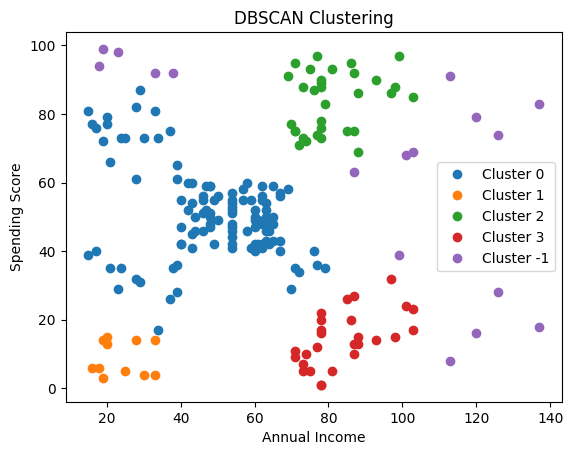

In [30]:
#plotting clusters
import matplotlib.pyplot as plt
import seaborn as sns
unique_labels = set(labels)
for label in unique_labels:
    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

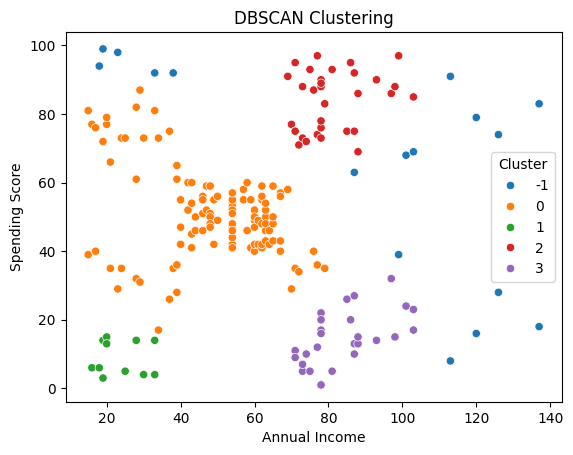

In [31]:
df = pd.DataFrame(X, columns=['Annual Income', 'Spending Score'])
df['Cluster'] = labels

# Plotting
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', palette='tab10', data=df)
plt.title('DBSCAN Clustering')
plt.show()

In [32]:
import plotly.express as px
df = pd.DataFrame(X, columns=['Annual Income', 'Spending Score'])
df['Cluster'] = labels

# Plotting
fig = px.scatter(df, x='Annual Income', y='Spending Score', color='Cluster', title='DBSCAN Clustering')
fig.show()

*Cluster -1 indicates Noise points**

**8. Conclusion**
---
DBSCAN is a powerful clustering algorithm that doesn’t require you to know the number of clusters beforehand. It’s great at handling noise and clusters of varying shapes. Just be careful with choosing the right values for eps and minPts!

